In [1]:
from google.colab import drive
drive.mount('/content/grdive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grdive


In [0]:
import pandas as pd
import numpy as np
import math 
from collections import deque
from numpy import array
import random
import datetime
import calendar
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
df =pd.read_excel('/content/grdive/My Drive/CFD Machine Learning/CFD.xlsx')

In [4]:
df.head()

,Pressure,Density,Temperature,ccx,ccy,ccz,U1,U2,U3
0,99999.401,1.186296,293.0,-15.66665,-15.66665,0.333333,1.000053,0.000269,0.000074
1,99999.401,1.186296,293.0,-15.00000,-15.66665,0.333333,1.000582,0.000954,0.000260
2,99999.400,1.186296,293.0,-14.33335,-15.66665,0.333333,1.001449,0.001724,0.000427
3,99999.399,1.186296,293.0,-13.66665,-15.66665,0.333333,1.002579,0.002579,0.000593
4,99999.397,1.186296,293.0,-13.00000,-15.66665,0.333333,1.003905,0.003499,0.000760


In [0]:
df=df.iloc[:,3:9]

In [6]:
df.head()

,ccx,ccy,ccz,U1,U2,U3
0,-15.66665,-15.66665,0.333333,1.000053,0.000269,0.000074
1,-15.00000,-15.66665,0.333333,1.000582,0.000954,0.000260
2,-14.33335,-15.66665,0.333333,1.001449,0.001724,0.000427
3,-13.66665,-15.66665,0.333333,1.002579,0.002579,0.000593
4,-13.00000,-15.66665,0.333333,1.003905,0.003499,0.000760


In [0]:
#3D PLOT OF DATAPOINTS
X_datapoints=array(df.iloc[0:10,0])
Y_datapoints=array(df.iloc[0:10,1])
Z_datapoints=array(df.iloc[0:10,2])

Text(0.5, 0, 'z axis')

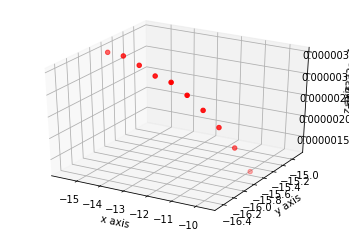

In [0]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_datapoints,Y_datapoints,Z_datapoints, c='r', marker='o')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

In [0]:
type(X_datapoints)

numpy.ndarray

In [0]:
print("X min "+str(min(df.iloc[:,0])))
print("X max "+str(max(df.iloc[:,0])))
print("Y min "+str(min(df.iloc[:,1])))
print("Y max "+str(max(df.iloc[:,1])))
print("Z min "+str(min(df.iloc[:,2])))
print("Z max "+str(max(df.iloc[:,2])))

X min -15.66665
X max 47.66665
Y min -15.666651
Y max 15.666651
Z min 0.1652128
Z max 39.66665


In [7]:
df.head()

,ccx,ccy,ccz,U1,U2,U3
0,-15.66665,-15.66665,0.333333,1.000053,0.000269,0.000074
1,-15.00000,-15.66665,0.333333,1.000582,0.000954,0.000260
2,-14.33335,-15.66665,0.333333,1.001449,0.001724,0.000427
3,-13.66665,-15.66665,0.333333,1.002579,0.002579,0.000593
4,-13.00000,-15.66665,0.333333,1.003905,0.003499,0.000760


In [0]:
df['distance']=np.sqrt((df['ccx']**2)+(df['ccy']**2)+(df['ccz']**2))

In [0]:
df=df.sort_values('distance')

In [11]:
df.head()

,ccx,ccy,ccz,U1,U2,U3,distance
276101,-3.549367,0.873805,0.165214,0.157078,0.312564,0.086993,3.659076
276075,-3.549369,-0.873805,0.165215,0.186573,0.425258,0.081138,3.659077
276008,-0.873900,-3.549809,0.165215,1.250538,0.322960,0.072068,3.659527
276166,-0.873901,3.549815,0.165213,1.157566,0.301015,0.068508,3.659534
2717,0.873998,3.550097,0.165215,0.683874,0.066385,0.019641,3.659830


In [0]:
temp=df.iloc[:,[0,1,2,6,3,4,5]].values

In [13]:
temp[0:3]

array([[-3.549367  ,  0.87380452,  0.16521418,  3.65907586,  0.15707782,
         0.31256394,  0.08699269],
       [-3.5493686 , -0.87380452,  0.16521537,  3.65907747,  0.18657283,
         0.42525832,  0.08113756],
       [-0.87390024, -3.5498086 ,  0.16521504,  3.65952712,  1.2505379 ,
         0.32296031,  0.07206796]])

In [0]:
sequential_data=[]
nearby_velocities =deque(maxlen=501)
temp_data=deque(maxlen=501)

In [0]:
#Creates the complete sequential data to be split into train and test sequences
for i in range(0,len(temp)-1):
  nearby_velocities.append([n for n in temp[i][0:4]])
  temp_data.append([n for n in temp[i][4:7]])
  if len(nearby_velocities) ==501:
      sequential_data.append([np.array(nearby_velocities),np.array(temp_data[250])])
  

In [16]:
sequential_data

[[array([[-3.549367  ,  0.87380452,  0.16521418,  3.65907586],
         [-3.5493686 , -0.87380452,  0.16521537,  3.65907747],
         [-0.87390024, -3.5498086 ,  0.16521504,  3.65952712],
         ...,
         [-1.8376123 ,  3.1691932 ,  1.8333416 ,  4.09655293],
         [-1.8376173 , -3.1691932 ,  1.8333427 ,  4.09655567],
         [ 1.837954  , -3.1697299 ,  1.8333418 ,  4.09712151]]),
  array([-0.17012018,  0.52494882,  0.05771022])],
 [array([[-3.5493686 , -0.87380452,  0.16521537,  3.65907747],
         [-0.87390024, -3.5498086 ,  0.16521504,  3.65952712],
         [-0.87390141,  3.5498153 ,  0.1652128 ,  3.6595338 ],
         ...,
         [-1.8376173 , -3.1691932 ,  1.8333427 ,  4.09655567],
         [ 1.837954  , -3.1697299 ,  1.8333418 ,  4.09712151],
         [ 1.837954  ,  3.1697315 ,  1.8333427 ,  4.09712315]]),
  array([-0.08395692,  0.00891135,  0.09429741])],
 [array([[-0.87390024, -3.5498086 ,  0.16521504,  3.65952712],
         [-0.87390141,  3.5498153 ,  0.1652128 

In [0]:
#random.shuffle(sequential_data)

In [17]:
print(len(sequential_data))

345666


In [0]:
X_temp=array([n[0] for n in sequential_data[0:55000]])
Y_temp=array([n[1] for n in sequential_data[0:55000]])

In [19]:
print(X_temp.shape)
print(Y_temp.shape)

(55000, 501, 4)
(55000, 3)


In [0]:
X_temp[0][250]

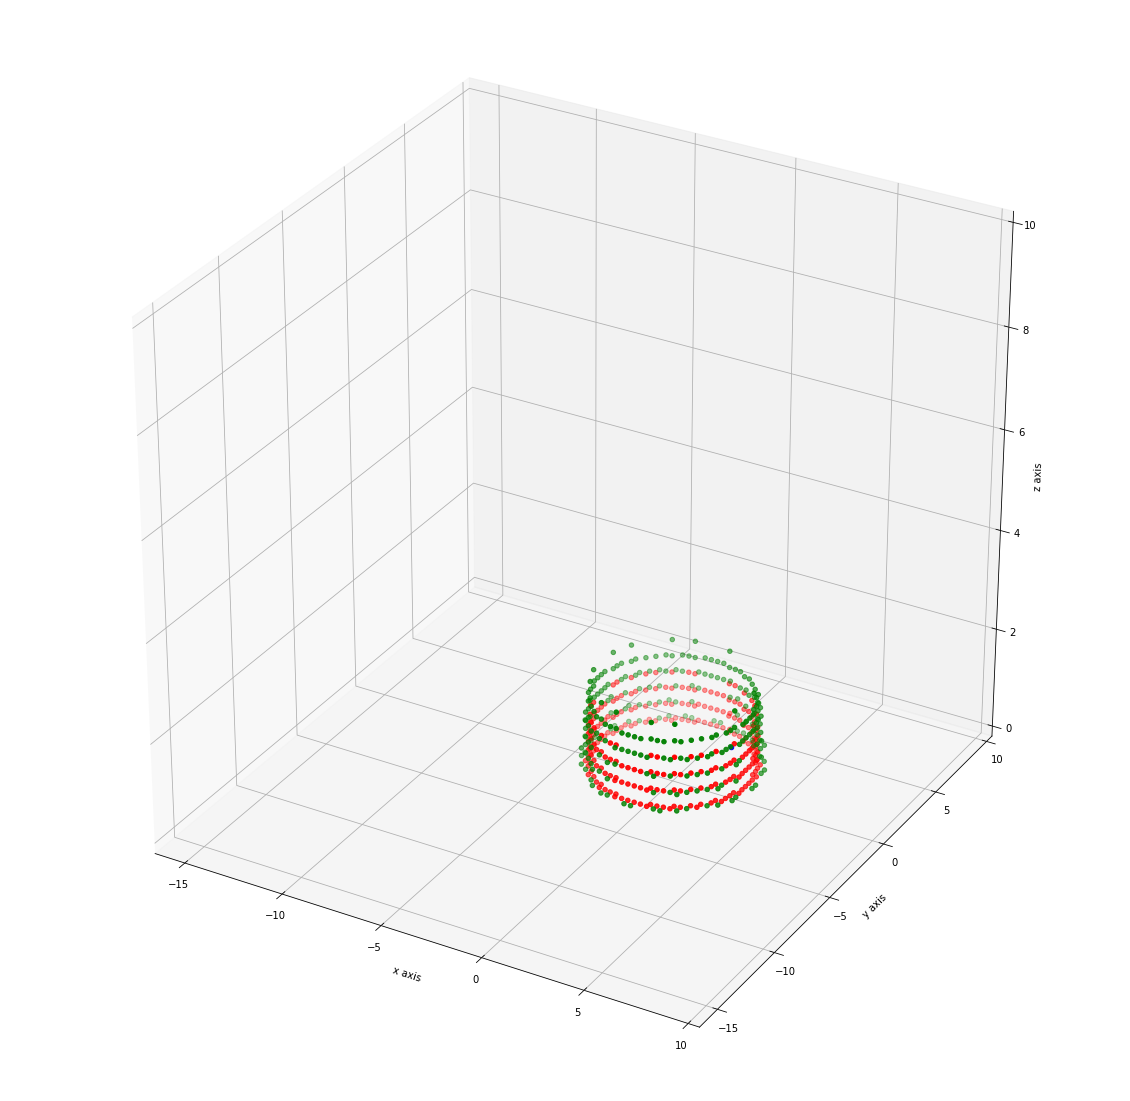

In [22]:
# PLOT the midpoint vsnearby points
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)


ax.scatter(X_temp[0][250][0],X_temp[0][250][1],X_temp[0][250][2], c='b', marker='o')
ax.scatter(X_temp[0,0:250,0],X_temp[0,0:250,1],X_temp[0,0:250,2], c='r', marker='o')
ax.scatter(X_temp[0,250:501,0],X_temp[0,250:501,1],X_temp[0,250:501,2], c='g', marker='o')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


In [0]:
#GET SPECIFIC INDEX
train_index=[]
validate_index=[]
for i in range(1, 55001):
  if(i%11)==0:
    validate_index.append(i)
  else:
    train_index.append(i) 

In [24]:
print(len(train_index))
print(len(validate_index))


50000
5000


In [25]:
print(min(train_index))
print(min(validate_index))
print(max(train_index))
print(max(validate_index))

1
11
54999
55000


In [0]:
X_train = np.copy(X_temp[train_index, ])
Y_train=np.copy(Y_temp[train_index, ])

In [0]:
X_validate = np.copy(X_temp[validate_index[:-1], ])
Y_validate = np.copy(Y_temp[validate_index[:-1], ])

In [28]:
#DONE TILL ABOVE
print(X_train.shape)
print(Y_train.shape)
print(X_validate.shape)
print(Y_validate.shape)

(50000, 501, 4)
(50000, 3)
(4999, 501, 4)
(4999, 3)


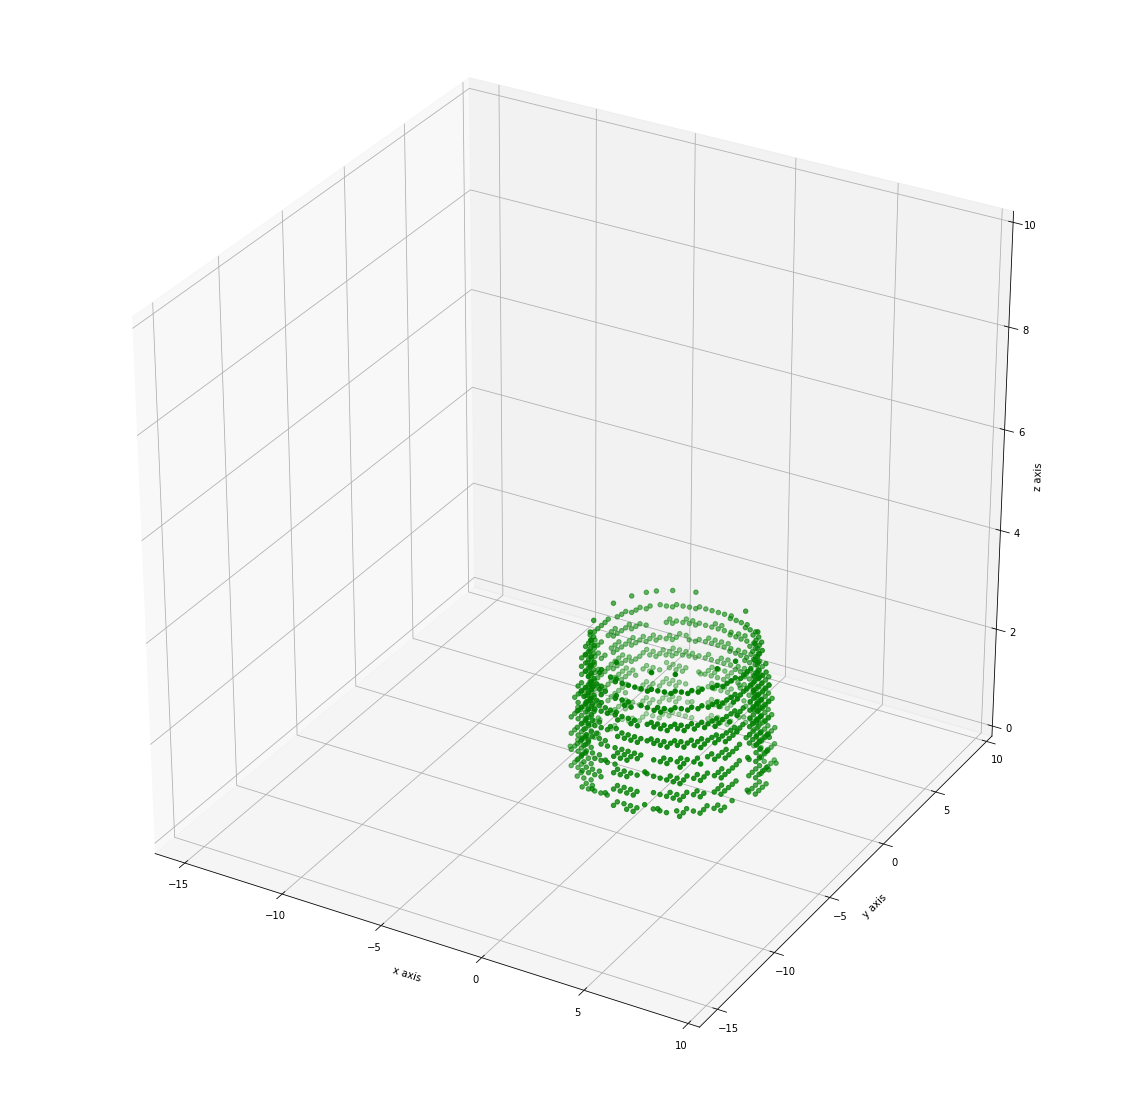

In [29]:
#Train dataset

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)

ax.scatter(X_train[0:1000,250,0],X_train[0:1000,250,1],X_train[0:1000,250,2], c='g', marker='o')


ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


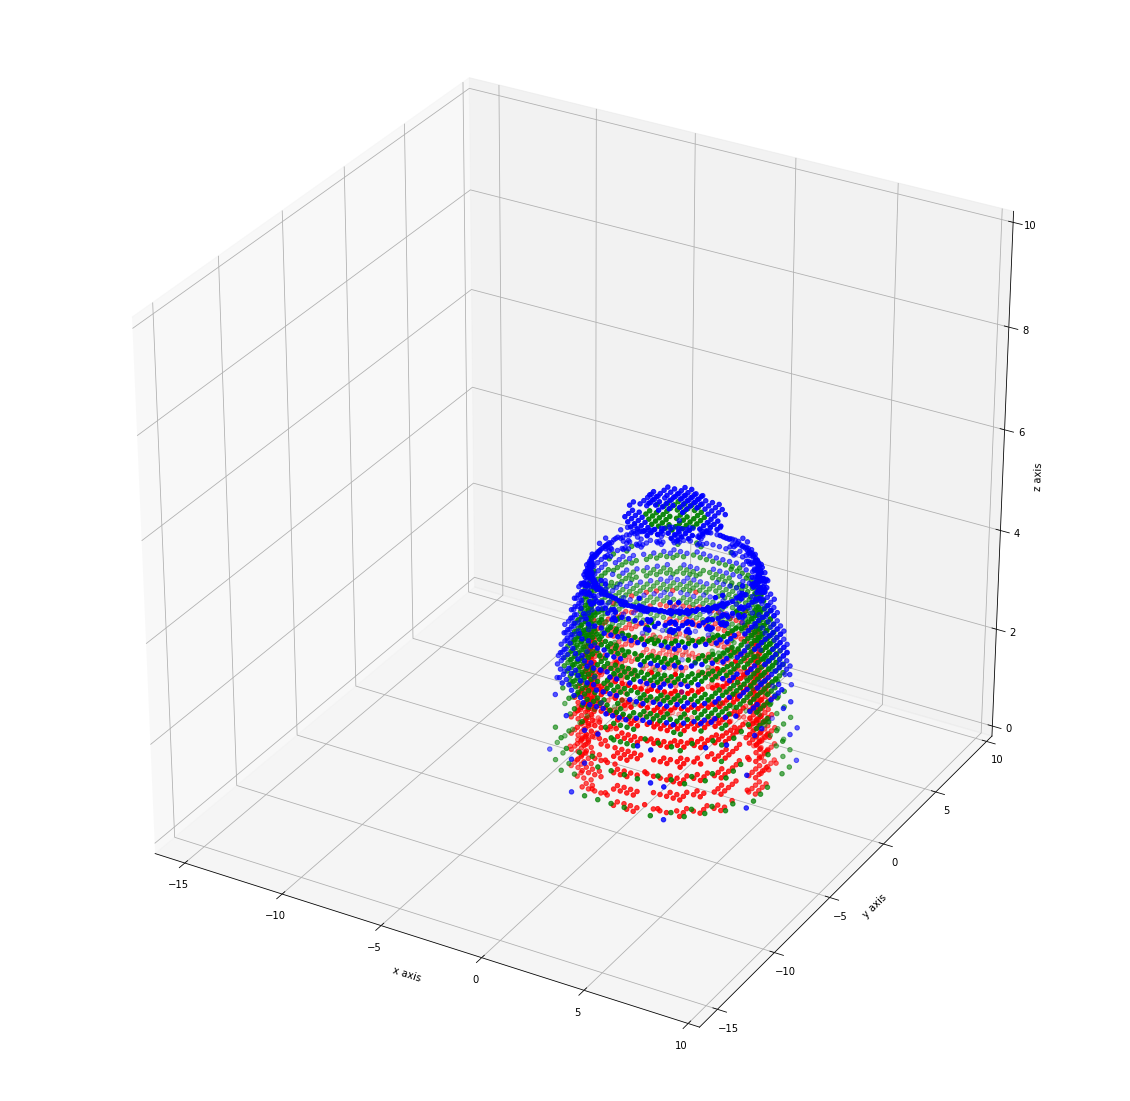

In [30]:
#3000 Train dataset points

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)

ax.scatter(X_train[0:1000,250,0],X_train[0:1000,250,1],X_train[0:1000,250,2], c='r', marker='o')

ax.scatter(X_train[1000:2000,250,0],X_train[1000:2000,250,1],X_train[1000:2000,250,2], c='g', marker='o')

ax.scatter(X_train[2000:3000,250,0],X_train[2000:3000,250,1],X_train[2000:3000,250,2], c='b', marker='o')

#ax.scatter(X_temp[0,250:501,0],X_temp[0,250:501,1],X_temp[0,250:501,2], c='g', marker='o')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


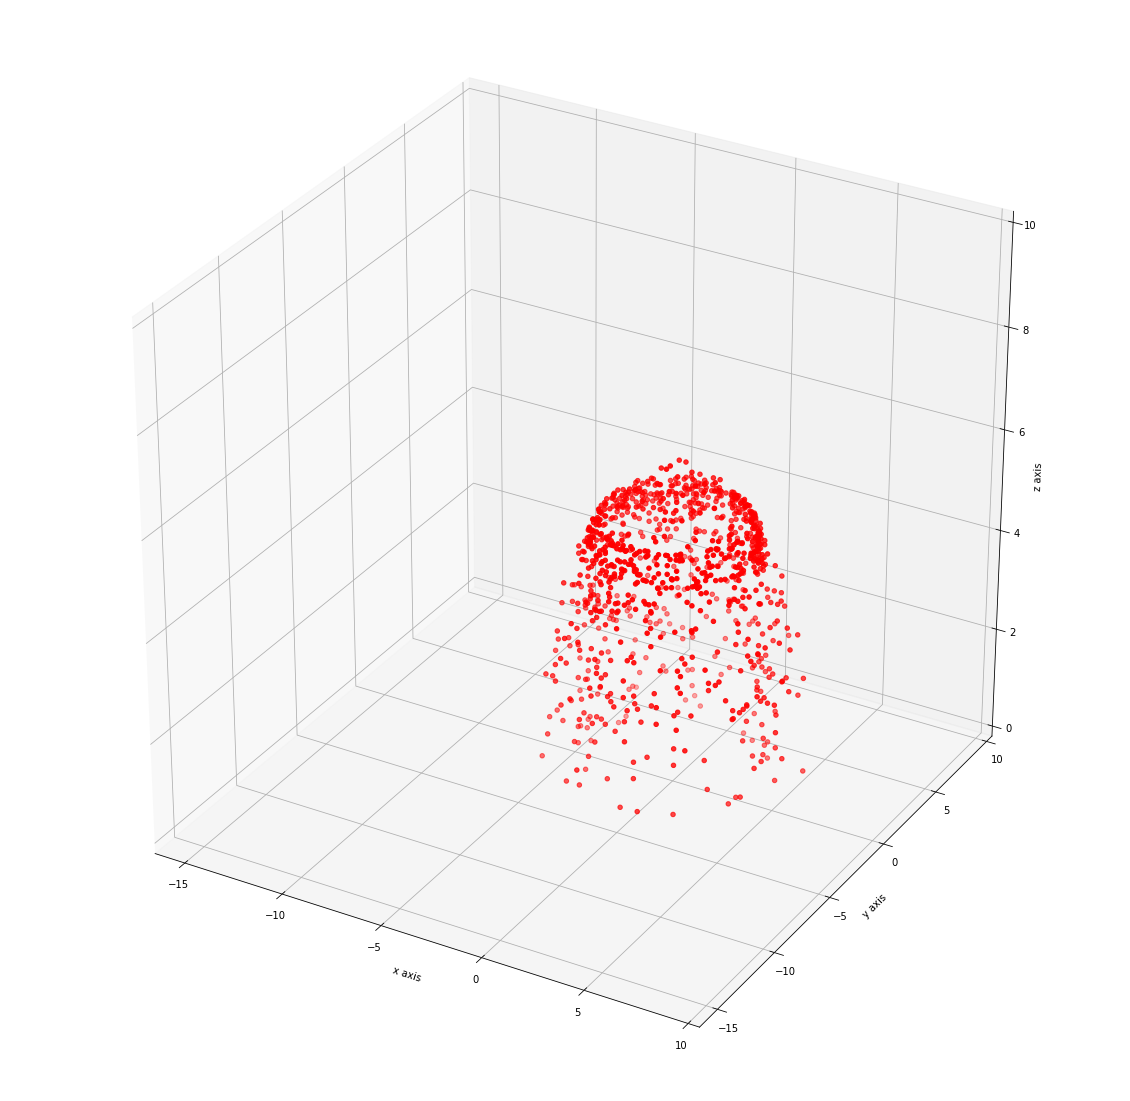

In [31]:
#1000 validation dataset points

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)

ax.scatter(X_validate[0:1000,250,0],X_validate[0:1000,250,1],X_validate[0:1000,250,2], c='r', marker='o')


ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


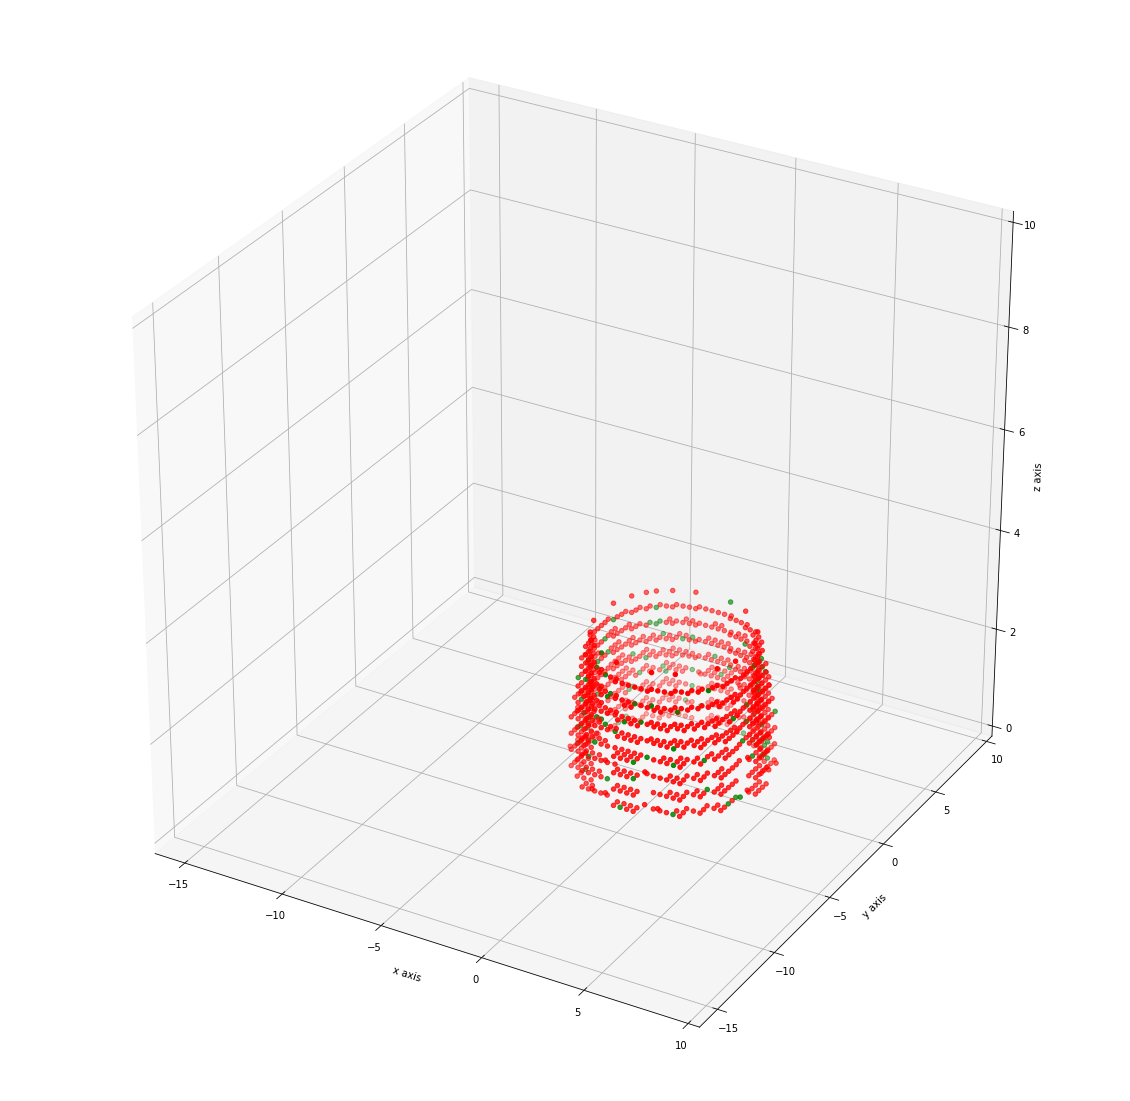

In [32]:
#1000 Train dataset points and 100 validation

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)

ax.scatter(X_train[0:1000,250,0],X_train[0:1000,250,1],X_train[0:1000,250,2], c='r', marker='o')


ax.scatter(X_validate[0:100,250,0],X_validate[0:100,250,1],X_validate[0:100,250,2], c='g', marker='o')


#ax.scatter(X_temp[0,250:501,0],X_temp[0,250:501,1],X_temp[0,250:501,2], c='g', marker='o')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


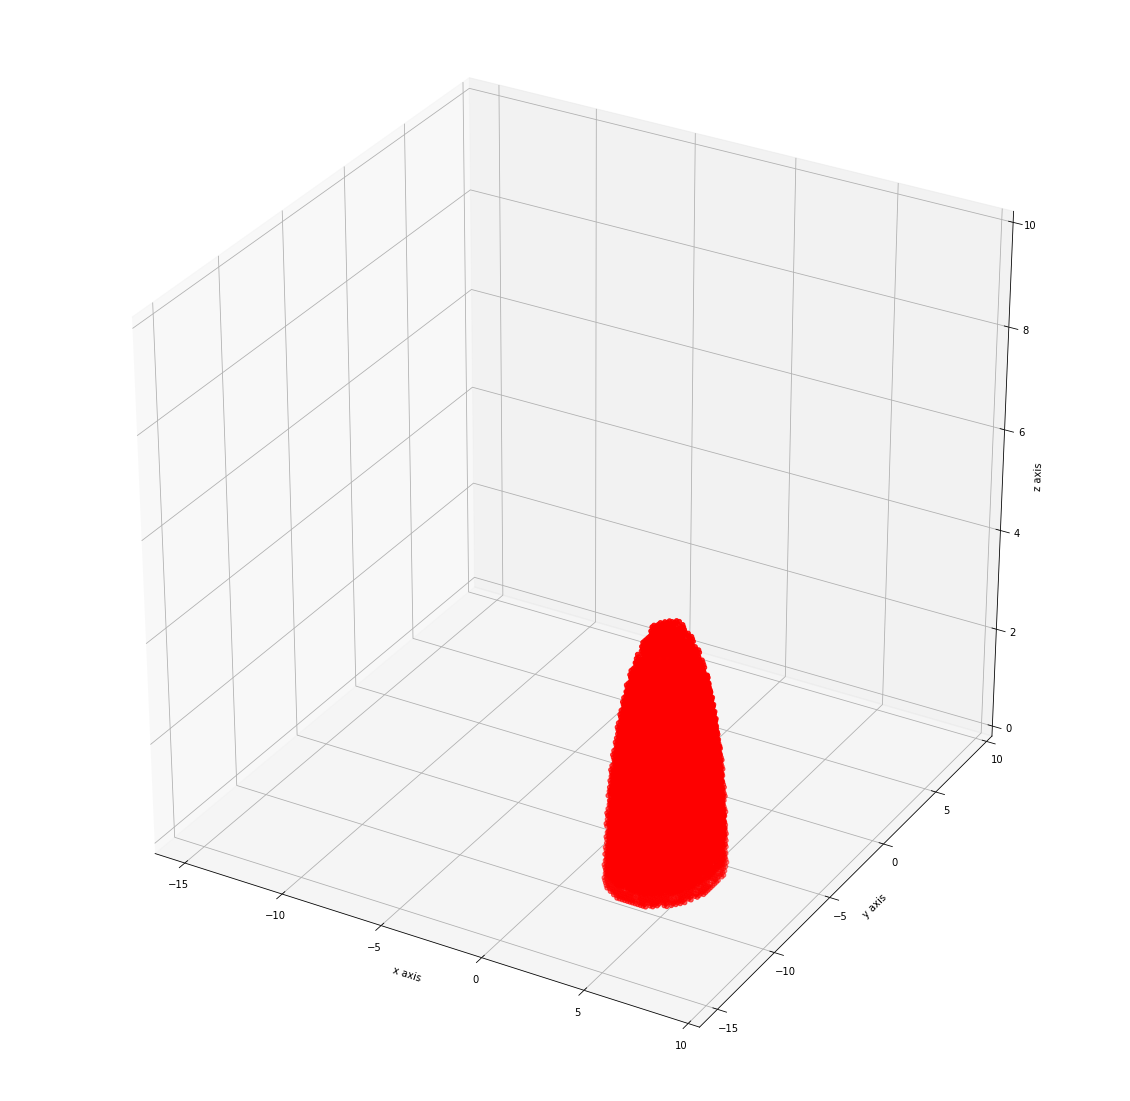

In [35]:
#All train dataset points

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)

ax.scatter(X_train[0:55000,250,0],X_train[0:55000,250,1],X_train[0:55000,250,2], c='r', marker='o')


#ax.scatter(X_temp[0,250:501,0],X_temp[0,250:501,1],X_temp[0,250:501,2], c='g', marker='o')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


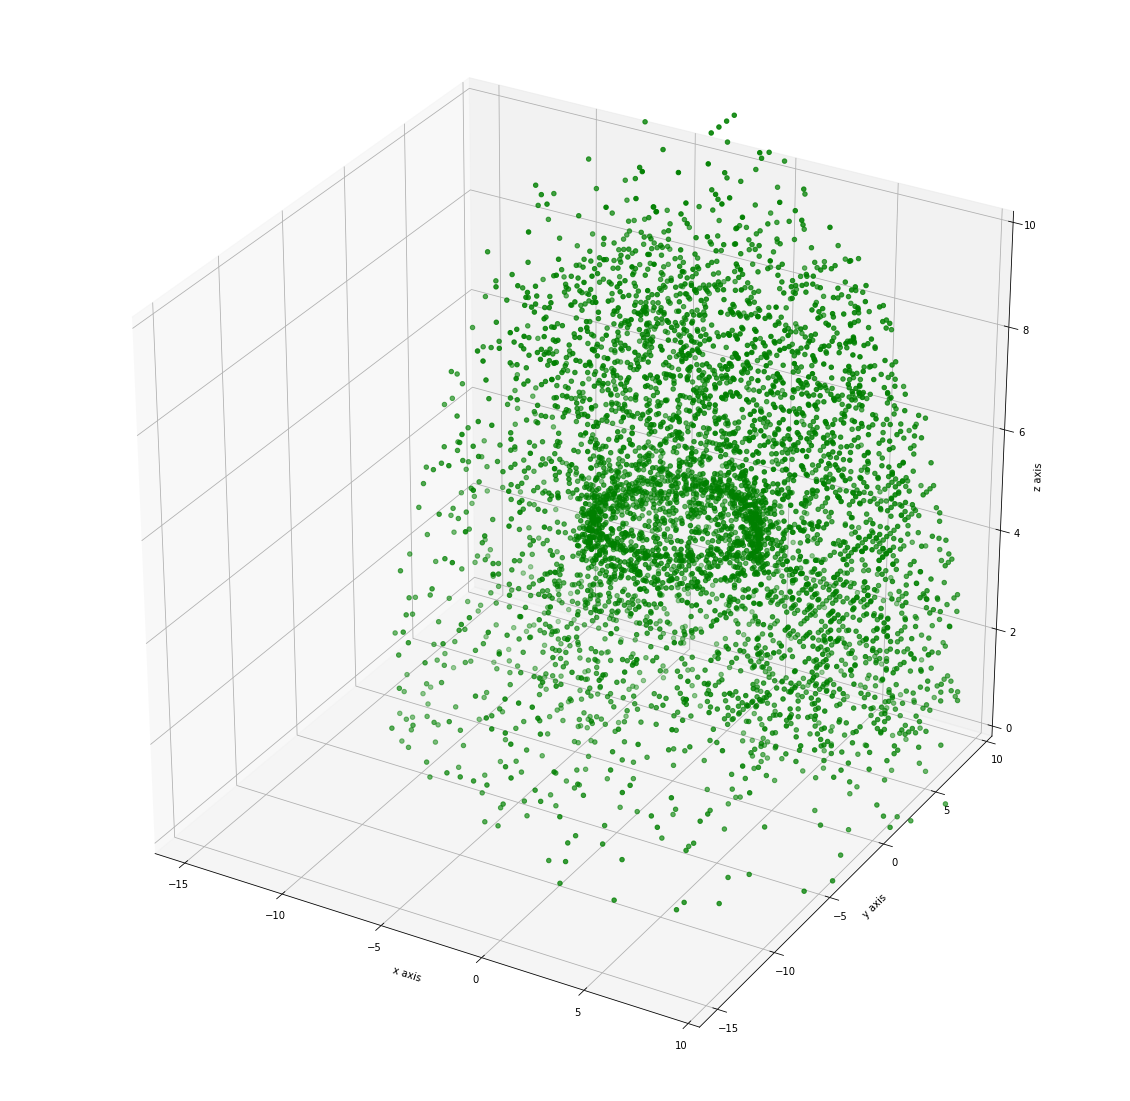

In [36]:
#All Test dataset points 

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.axes.set_xlim3d(left=-16,right=10)
ax.axes.set_ylim3d(bottom=-16,top=10)
ax.axes.set_zlim3d(bottom=0,top=10)



ax.scatter(X_validate[0:5000,250,0],X_validate[0:5000,250,1],X_validate[0:5000,250,2], c='g', marker='o')


ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()


In [0]:
'''
X_train=array([n[0] for n in sequential_data[0:50000]])
X_validate=array([n[0] for n in sequential_data[50000:55000]])
'''


'\nX_train=array([n[0] for n in sequential_data[0:50000]])\nX_validate=array([n[0] for n in sequential_data[50000:55000]])\n'

In [0]:
'''
Y_train=array([n[1] for n in sequential_data[0:50000]])
Y_validate=array([n[1] for n in sequential_data[50000:55000]])  #Y_test will be used for validation
'''

'\nY_train=array([n[1] for n in sequential_data[0:50000]])\nY_validate=array([n[1] for n in sequential_data[50000:55000]])  #Y_test will be used for validation\n'

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()

In [0]:
X_train[:,:,0]=sc_X.fit_transform(X_train[:,:,0])
X_train[:,:,1]=sc_X.fit_transform(X_train[:,:,1])
X_train[:,:,2]=sc_X.fit_transform(X_train[:,:,2])
X_train[:,:,3]=sc_X.fit_transform(X_train[:,:,3])
#done till here

In [0]:
X_validate[:,:,0]=sc_X.fit_transform(X_validate[:,:,0])
X_validate[:,:,1]=sc_X.fit_transform(X_validate[:,:,1])
X_validate[:,:,2]=sc_X.fit_transform(X_validate[:,:,2])
X_validate[:,:,3]=sc_X.fit_transform(X_validate[:,:,3])

In [0]:
Y_train=sc_Y.fit_transform(Y_train)
Y_validate=sc_Y.fit_transform(Y_validate)

In [0]:
                                    #RECURSIVE DEEP NEURAL NETWORK

import torch
import torch.nn as nn
import torchvision.datasets as datasets  #import the dataset
import torchvision.transforms as transforms  #
from torch.autograd import Variable  #autograd is a part of pytorch 0.3 but can also be used with pytorch 0.4
from torch.utils.data import Dataset
import sys

In [0]:
                                    #CONVERT NUMPY TO PYTORCH 
X_train=torch.tensor(X_train)
Y_train=torch.tensor(Y_train)
X_validate=torch.tensor(X_validate)
Y_validate=torch.tensor(Y_validate)

#CONVERT PYTORCH TENSOR TO VARIABLE FORMAT
X_train=Variable(X_train)
Y_train=Variable(Y_train)
X_validate=Variable(X_validate)
Y_validate=Variable(Y_validate)


In [41]:
print(X_train.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_validate.shape)

torch.Size([50000, 501, 4])
torch.Size([4999, 501, 4])
torch.Size([50000, 3])
torch.Size([4999, 3])


In [0]:
#WHEN WE ARE USING OUR OWN DATASET THEN WE NEED TO CREATE A DATASET CLASS WHICH INHERITS FROM PREDEFINED 
#DATASET CLASS OF torch.utils.data library
class Dataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
  
  def __getitem__(self,index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return len(self.x)

In [0]:
train_dataset=Dataset(X_train,Y_train)
validate_dataset=Dataset(X_validate,Y_validate)

In [47]:
print(train_dataset.x.shape)
print(train_dataset.y.shape)
print(validate_dataset.x.shape)
print(validate_dataset.y.shape)

torch.Size([50000, 501, 4])
torch.Size([50000, 3])
torch.Size([4999, 501, 4])
torch.Size([4999, 3])


In [0]:
#MAKE DATA ITERABLE BY LOADING IT TO A LOADER. Shuffe the data to make it independent of order
#Batch size is the number of elements in a batch
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=200,
                                        shuffle=True)

In [0]:
#MAKE DATA ITERABLE BY LOADING IT TO A LOADER. Shuffe the data to make it independent of order
#Batch size is the number of elements in a batch
validation_loader=torch.utils.data.DataLoader(dataset=validate_dataset,
                                        batch_size=200,
                                        shuffle=False)

In [50]:
len(validation_loader)

25

In [51]:
print(train_dataset.x.shape)
print(train_dataset.y.shape)
print(validate_dataset.x.shape)
print(validate_dataset.y.shape)

torch.Size([50000, 501, 4])
torch.Size([50000, 3])
torch.Size([4999, 501, 4])
torch.Size([4999, 3])


In [52]:
#THIS IS ONLY FOR DISPLAY PURPOSE TO UNDERSTAND THE DATA
print("There is {} batches in the dataset".format(len(train_loader)))
shown=0
for (x,y) in train_loader:
  if shown==1:
    break
  print("For one batch there is:")
  print("Data: {}, Type: {} ".format(x.shape,x.dtype))
  print("Data: {}, Type: {} ".format(y.shape,y.dtype))
  shown+=1
  

There is 250 batches in the dataset
For one batch there is:
Data: torch.Size([200, 501, 4]), Type: torch.float64 
Data: torch.Size([200, 3]), Type: torch.float64 


In [0]:
#Input of neural net 2 nodes and output of the neural net is 3 nodes
# Neural Net using 3 hidden layers each containing 3 nodes 

input_size=4
hidden_size=3

class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.bi_rcnn1=torch.nn.LSTM(input_size=4, hidden_size=3, num_layers=1, batch_first=False, bidirectional=True)   
    self.fc1=torch.nn.Linear(6,5)
    self.fc2=torch.nn.Linear(5,5)
    self.fc3=torch.nn.Linear(5,3)
    self.hyperbolic_tan=nn.Tanh()          
    self.relu_nonlinearity=nn.ReLU()
    
    #Input hidden hidden output  =>layer format
  def forward(self,x):
      out,hidden=self.bi_rcnn1(x)  
      out=out[:,250]  #Middle value-1 6 input values to fully connected layer  50 changed to 500
      out=self.hyperbolic_tan(out)
      out=self.fc1(out)
      out=self.relu_nonlinearity(out)
      out=self.fc2(out)
      out=self.relu_nonlinearity(out)
      out=self.fc3(out)
      return out  
  
  def init_hidden(self):
      # Initialize hidden and cell states
      # (num_layers * num_directions, batch, hidden_size)
      return Variable(torch.zeros(1, 200, 3))

    

In [0]:
# Instantiate LSTM model
model = Model()

In [55]:
print(model.parameters)

<bound method Module.parameters of Model(
  (bi_rcnn1): LSTM(4, 3, bidirectional=True)
  (fc1): Linear(in_features=6, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=3, bias=True)
  (hyperbolic_tan): Tanh()
  (relu_nonlinearity): ReLU()
)>


In [56]:
criterion=torch.nn.MSELoss(size_average=True)   #Loss Criterion

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [0]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
start_time=calendar.timegm(time.gmtime())
epochs=150   #We have done it for 150 epochs 
for epoch in range(epochs):
  for x, y in train_loader:
    x=Variable(x.float())
    y=Variable(y.float())
    outputs=model(x)
    optimizer.zero_grad()
    
    loss=criterion(outputs,y)
    loss.backward()
    optimizer.step()
  
  print("EPOCH {} COMPLETED".format(epoch))
  print("Training loss: {}".format(loss.item()))
end_time=calendar.timegm(time.gmtime())

EPOCH 0 COMPLETED
Training loss: 0.3882969915866852
EPOCH 1 COMPLETED
Training loss: 0.24516834318637848
EPOCH 2 COMPLETED
Training loss: 0.21331694722175598
EPOCH 3 COMPLETED
Training loss: 0.23274332284927368
EPOCH 4 COMPLETED
Training loss: 0.20633631944656372
EPOCH 5 COMPLETED
Training loss: 0.19623833894729614
EPOCH 6 COMPLETED
Training loss: 0.1697845757007599
EPOCH 7 COMPLETED
Training loss: 0.17938360571861267
EPOCH 8 COMPLETED
Training loss: 0.1683795303106308
EPOCH 9 COMPLETED
Training loss: 0.2041563242673874
EPOCH 10 COMPLETED
Training loss: 0.12234964966773987
EPOCH 11 COMPLETED
Training loss: 0.17590051889419556
EPOCH 12 COMPLETED
Training loss: 0.16328050196170807
EPOCH 13 COMPLETED
Training loss: 0.14529389142990112
EPOCH 14 COMPLETED
Training loss: 0.12481554597616196
EPOCH 15 COMPLETED
Training loss: 0.13650859892368317


In [0]:
end_time=calendar.timegm(time.gmtime())
total_time=(end_time-start_time)/3600
print("FIRST 150 EPOCHS COMPLETED!!!")
print("Time taken to run in hrs is: "+str(total_time))

FIRST 150 EPOCHS COMPLETED!!!
Time taken to run in hrs is: 2.716111111111111


In [0]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
start_time=calendar.timegm(time.gmtime())
epochs=33   #We have done it for 100 epochs 
for epoch in range(epochs):
  for x, y in train_loader:
    x=Variable(x.float())
    y=Variable(y.float())
    outputs=model(x)
    optimizer.zero_grad()
    
    loss=criterion(outputs,y)
    loss.backward()
    optimizer.step()
  
  print("EPOCH {} COMPLETED".format(epoch))
  print("Training loss: {}".format(loss.item()))
end_time=calendar.timegm(time.gmtime())

EPOCH 0 COMPLETED
Training loss: 0.10062920302152634
EPOCH 1 COMPLETED
Training loss: 0.09847556799650192
EPOCH 2 COMPLETED
Training loss: 0.11028552055358887
EPOCH 3 COMPLETED
Training loss: 0.08675704151391983
EPOCH 4 COMPLETED
Training loss: 0.10394496470689774
EPOCH 5 COMPLETED
Training loss: 0.1109200045466423
EPOCH 6 COMPLETED
Training loss: 0.11406049877405167
EPOCH 7 COMPLETED
Training loss: 0.10162849724292755
EPOCH 8 COMPLETED
Training loss: 0.08562490344047546
EPOCH 9 COMPLETED
Training loss: 0.11690878868103027
EPOCH 10 COMPLETED
Training loss: 0.09469441324472427
EPOCH 11 COMPLETED
Training loss: 0.1171785369515419
EPOCH 12 COMPLETED
Training loss: 0.10632798075675964
EPOCH 13 COMPLETED
Training loss: 0.11898268759250641
EPOCH 14 COMPLETED
Training loss: 0.1092785969376564
EPOCH 15 COMPLETED
Training loss: 0.11364533007144928
EPOCH 16 COMPLETED
Training loss: 0.11357031762599945
EPOCH 17 COMPLETED
Training loss: 0.10923442989587784
EPOCH 18 COMPLETED
Training loss: 0.10968

KeyboardInterrupt: ignored

In [0]:
total_time=(end_time-start_time)/3600
print("SECOND 100 EPOCHS COMPLETED!!!")
print("Time taken to run in hrs is: "+str(total_time))

SECOND 100 EPOCHS COMPLETED!!!
Time taken to run in hrs is: 0.0


In [0]:
count=1
for x, y in validation_loader:
    x=Variable(x.float())
    y=Variable(y.float())
    outputs=model(x)
    
    for i,j in zip(outputs,y):
      print("Predicted "+str(i)+" Actual "+str(j))
    print("Batch: {} completed".format(count))
    count=count+1

Predicted tensor([-0.5628,  2.5164, -0.4584], grad_fn=<SelectBackward>) Actual tensor([ 0.4217,  2.6512, -0.5303])
Predicted tensor([-0.5597,  0.1836, -0.4953], grad_fn=<SelectBackward>) Actual tensor([-0.5280, -0.3609, -0.5194])
Predicted tensor([ 0.2116,  2.1793, -0.3960], grad_fn=<SelectBackward>) Actual tensor([ 0.8876,  2.2663, -0.5157])
Predicted tensor([-1.0827,  0.7715, -0.5247], grad_fn=<SelectBackward>) Actual tensor([-1.0564,  0.6057, -0.5161])
Predicted tensor([-0.4585,  0.2848, -0.4866], grad_fn=<SelectBackward>) Actual tensor([-0.3959,  0.7914, -0.5197])
Predicted tensor([-0.4270, -0.4286, -0.5431], grad_fn=<SelectBackward>) Actual tensor([ 0.2641, -0.9123, -0.5086])
Predicted tensor([-1.2276,  0.8429, -0.5369], grad_fn=<SelectBackward>) Actual tensor([-0.9283,  0.9184, -0.5319])
Predicted tensor([ 0.6730,  2.5089, -0.3533], grad_fn=<SelectBackward>) Actual tensor([ 1.1433,  2.3738, -0.5102])
Predicted tensor([-0.0328,  1.9646, -0.4171], grad_fn=<SelectBackward>) Actual t

In [0]:
outputs=sc_Y.inverse_transform(outputs.detach().numpy())
y=sc_Y.inverse_transform(y.detach().numpy())

In [0]:
#VELOCITY IN ACTUAL FORMAT AFTER INVERSE TRANSFORMATION FOR THE LAST BATCH ie for 200 observations
for i,j in zip(outputs,y):
  print("Predicted "+str(i)+" Actual "+str(j))

Predicted [0.83176136 0.48616192 0.48909333] Actual [0.723264   0.46049023 0.08351077]
Predicted [0.20380202 0.17761412 0.07641615] Actual [0.38317952 0.17775188 0.09908761]
Predicted [0.07518262 0.13689642 0.00368728] Actual [ 0.12511411  0.0787138  -0.2534791 ]
Predicted [-0.22495875  0.45445046  0.09561886] Actual [-0.14056113  0.26401997 -0.33500895]
Predicted [-0.07056734  0.38806415  0.17229761] Actual [-0.11240706  0.30739576 -0.3261958 ]
Predicted [-0.43588707  0.12855546 -0.10579215] Actual [-0.33928666  0.10080658 -0.3405095 ]
Predicted [0.46018058 0.1784329  0.08972539] Actual [0.5674775  0.1774675  0.19165267]
Predicted [0.30111793 0.61914414 0.44758847] Actual [ 0.12892559  0.5607092  -0.03818093]
Predicted [0.95548636 0.02684707 0.02706231] Actual [0.9746853  0.03931284 0.0366291 ]
Predicted [0.9555321  0.02927685 0.0299045 ] Actual [0.9914372  0.03789093 0.04512013]
Predicted [0.963837   0.04512328 0.05298914] Actual [1.0223683  0.03323542 0.06432714]
Predicted [-0.61787

In [0]:
#R-SQUARED METRIC X AXIS
R_residual=((outputs[:,0]-y[:,0])**2).sum()
R_total=((outputs[:,0]-np.average(y[:,0]))**2).sum()
R_squared=1-(R_residual/R_total)
print(R_squared)


0.9197658821940422


In [0]:
#R-SQUARED METRIC Y AXIS
R_residual=((outputs[:,1]-y[:,1])**2).sum()
R_total=((outputs[:,1]-np.average(y[:,1]))**2).sum()
R_squared=1-(R_residual/R_total)
print(R_squared)


0.8452651500701904


In [0]:
#R-SQUARED METRIC Z AXIS
R_residual=((outputs[:,2]-y[:,2])**2).sum()
R_total=((outputs[:,2]-np.average(y[:,2]))**2).sum()
R_squared=1-(R_residual/R_total)
print(R_squared)

0.866865947842598


In [0]:
#Error difference for 200 values
for i,j in zip(outputs,y):
  print("Error x "+str(i[0]-j[0])+" Error y "+str(i[1]-j[1])+" Error z "+str(i[2]-j[2]))

Error x 0.10849738 Error y 0.02567169 Error z 0.40558255
Error x -0.1793775 Error y -0.00013776124 Error z -0.022671461
Error x -0.049931496 Error y 0.058182612 Error z 0.2571664
Error x -0.084397614 Error y 0.19043049 Error z 0.43062782
Error x 0.04183972 Error y 0.08066839 Error z 0.49849343
Error x -0.09660041 Error y 0.027748883 Error z 0.23471735
Error x -0.10729694 Error y 0.00096540153 Error z -0.10192728
Error x 0.17219234 Error y 0.058434963 Error z 0.4857694
Error x -0.019198954 Error y -0.012465777 Error z -0.009566784
Error x -0.035905123 Error y -0.00861408 Error z -0.015215635
Error x -0.058531284 Error y 0.011887863 Error z -0.0113379955
Error x 0.00066387653 Error y 0.036215752 Error z 0.0010294914
Error x -0.1170696 Error y 0.008505791 Error z 0.37466955
Error x 0.060199976 Error y -0.11740674 Error z -0.26831734
Error x -0.06357986 Error y -0.08278413 Error z -0.07724285
Error x 0.06548232 Error y 0.007494271 Error z 0.31609616
Error x 0.0056696534 Error y 0.026460798

In [0]:
'''
#Error difference for 200 values
for i,j in zip(outputs,y):
  print("Error x "+str((i[0]-j[0])*100/j[0])
        +" Error y "+str((i[1]-j[1])*100/j[1])+" Error z "+str((i[2]-j[2])*100/j[2]))
  '''

In [0]:
o=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
print(o[2:12:3])

In [0]:
11%11